<a href="https://colab.research.google.com/github/blandersonw/MachineLearning/blob/main/HW4_1_BlakeAnderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are going to train ridge regression using SGD.
Ridge regression has the cost function = MSE + alpha*||w||^2, where ||w|| is the Euclidean norm.
The goal is to find two optimal hyperparameters 1) learning rate of SGD and 2) alpha.

First, generate data like this:

np.random.seed(0)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.3 * X**2 + 2*np.random.randn(m, 1)
y = y.reshape((m))

Use the seed 0.

1. Randomly split the data into 80% training data and 20% testing data. Then split the training data again into 75% training data and 25% validation data. Keep this split fixed.

2. Use SGDRegressor(max_iter=1000, tol=-np.infty, warm_start=True, penalty="l2", learning_rate="constant", random_state=0, alpha=alpha, eta0=eta0)
What does this do? Comment on the choice of arguments above.
Here alpha and eta0 are the value you are going to provide as the regularization weight and the learning rate.

3. For each combinations of alphas = [1E-6,1E-5,1E-4,1E-3,1E-2,1E-1], eta0s = [1E-6,1E-5,1E-4,1E-3,1E-2,1E-1] 

(a) instantiate SGDRegressor,
(b) call fit(),
(c) call predict() and measure training and validation scores.

4. Report the training and validation error for each combination. Which combination has the smallest validation error?

5. Now use these hyperparameters to retrain the model from scratch using ALL training data (=train + validation sets).Plot the training and test error as a function of epochs. You might want to use SGDRegressor(max_iter=1, ... )

6. Report the test score or this final model, and also plot the test data vs final linear regression as a line.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
#generating data
np.random.seed(0)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.3 * X**2 + 2*np.random.randn(m, 1)
y = y.reshape((m))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
X_train1, X_vali, y_train1, y_vali = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [ ]:
#created sgdr function
def sgdr(alpha_in,eta_in):
  return(SGDRegressor(max_iter=1000, tol=-np.infty, warm_start=True, penalty="l2", learning_rate="constant", random_state=0, alpha=alpha_in, eta0=eta_in))

In [ ]:
#testing sgdr with each respective alpha and eta value
def sgdr_with_vals():

  count = 10**10
  combo = [0,0]

  for i in range(1,7):

    for j in range(1,7):

      alphaval, etaval = 10**(-i), 10**(-j)

      sgdr_results = sgdr(alphaval,etaval)
      sgdr_results.fit(X_train1,y_train1)

      ypred_train1 = sgdr_results.predict(X_train1)
      ypred_vali = sgdr_results.predict(X_vali)
      mse_train1 = mean_squared_error(y_train1, ypred_train1)
      mse_vali = mean_squared_error(y_vali, ypred_vali)

      print("Alpha:", str(alphaval), "-- Eta:", str(etaval), "-- Training error", str(mse_train1))
      print("Alpha:", str(alphaval), "-- Eta:", str(etaval), "-- Validation error", str(mse_vali), "\n")

      if (mse_vali)<count:
        count=(mse_vali)
        combo[0],combo[1]= alphaval,etaval
  print("Lowest validation error is ", count, "with alpha value ", combo[0], "and eta value ", combo[1])
sgdr_with_vals()

Alpha: 0.1 -- Eta: 0.1 -- Training error 4.869036339843277
Alpha: 0.1 -- Eta: 0.1 -- Validation error 4.154711978903861 

Alpha: 0.1 -- Eta: 0.01 -- Training error 4.227353940953981
Alpha: 0.1 -- Eta: 0.01 -- Validation error 4.107987699259884 

Alpha: 0.1 -- Eta: 0.001 -- Training error 4.161793058439446
Alpha: 0.1 -- Eta: 0.001 -- Validation error 4.138689750369738 

Alpha: 0.1 -- Eta: 0.0001 -- Training error 4.1614615973691995
Alpha: 0.1 -- Eta: 0.0001 -- Validation error 4.147535195225035 

Alpha: 0.1 -- Eta: 1e-05 -- Training error 7.499661170424136
Alpha: 0.1 -- Eta: 1e-05 -- Validation error 9.2061221342123 

Alpha: 0.1 -- Eta: 1e-06 -- Training error 15.016184376067908
Alpha: 0.1 -- Eta: 1e-06 -- Validation error 18.04897851181058 

Alpha: 0.01 -- Eta: 0.1 -- Training error 4.828071234196536
Alpha: 0.01 -- Eta: 0.1 -- Validation error 4.126516499857823 

Alpha: 0.01 -- Eta: 0.01 -- Training error 4.202686240695504
Alpha: 0.01 -- Eta: 0.01 -- Validation error 4.10582680401996 


In [ ]:
#regression function with best fit alpha and eta
sgdr_full = SGDRegressor(max_iter=1000, tol=-np.infty, warm_start=True, penalty="l2", learning_rate="constant", random_state=0, alpha=.01, eta0=.01)
sgdr_full.fit(X_train,y_train)

ypred_train = sgdr_full.predict(X_train)
ypred_test = sgdr_full.predict(X_test)

mse_train = mean_squared_error(y_train, ypred_train)
mse_test = mean_squared_error(y_test, ypred_test)

print(mse_train)
print(mse_test)
print(mse_train+mse_test)

4.149222251881741
4.487591463023634
8.636813714905376


In [ ]:
#running model with respective number of epochs

train_epochs = []
train_epochsval = []
test_epochs = []
test_epochsval = []
for i in range(1,51):
  sgdr_full = SGDRegressor(max_iter=i, tol=-np.infty, warm_start=True, penalty="l2", learning_rate="constant", random_state=0, alpha=.01, eta0=.01)
  sgdr_full.fit(X_train, y_train)
  y_epochtrain = sgdr_full.predict(X_train)
  y_epochtest = sgdr_full.predict(X_test)
  mse_epochtrain = mean_squared_error(y_epochtrain, y_train)
  mse_epochtest = mean_squared_error(y_epochtest, y_vali)
  train_epochs.append(i)
  train_epochsval.append(mse_epochtrain)
  test_epochs.append(i)
  test_epochsval.append(mse_epochtest)

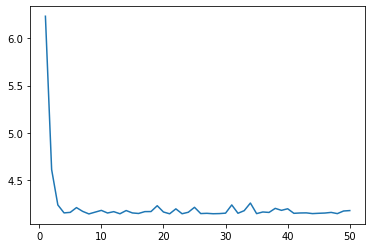

In [ ]:
#plotting training data with epochs
import matplotlib.pyplot
plt.plot(train_epochs, train_epochsval)

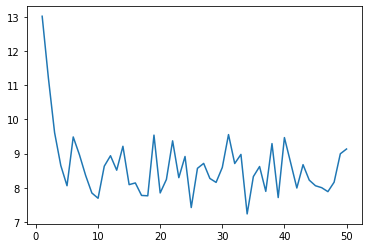

In [ ]:
#plotting test data with epochs
plt.plot(test_epochs, test_epochsval)

In [ ]:
#test error with epoch test
test_error = mean_squared_error(y_epochtest, y_test)
test_error

4.457169127819397

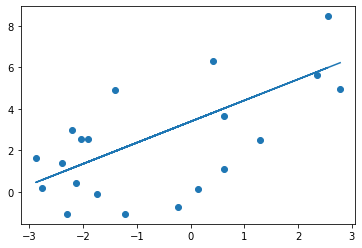

In [ ]:
#plotting test data vs final linear regression
plt.scatter(X_test, y_test)
plt.plot(X_test, y_epochtest)